In [1]:
pip install (openpyxl, plotly)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install (openpyxl, plotly)'


In [2]:
# @title Объединение данных
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import patheffects
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from openpyxl import load_workbook
import warnings
warnings.filterwarnings("ignore")


# 1. загружаем данные
path = '/content/тестовое.xlsx'
leads = pd.read_excel(path, sheet_name=0)
deals = pd.read_excel(path, sheet_name=1)
sales_reports = pd.read_excel(path, sheet_name=2)

# 2. объединяем таблицы
lead_analysis = (leads.merge(deals, left_on='Company Name', right_on='Company', how='left', suffixes=('_lead', '_deal'))).merge(
    sales_reports, on='Company: ID', how='left')

## - берем нужные столбцы
lead_analysis = lead_analysis[[
    'ID_lead', 'ID_deal',	'Source', 'Lead_status_crm', 'Disqualification reason (SOFT)', 'Disqualification reason (HARD)',
    'Work E-mail', 'Created_lead', 'Created_deal', 'Country (for lead)', 'Company Name', 'Company: ID', 'Deal status_crm',
    '$/Product: Amount after Discount (before VAT)', 'Deal Currency'
    ]]

# 3. объединяем строки по одной сделке в одну, суммируя все выплаты по ней в одну ячейку
lead_analysis['Amount $'] = np.nan
for i in lead_analysis['ID_deal'].unique():
  lead_analysis.loc[lead_analysis['ID_deal']==i, 'Amount $'] = round(
      lead_analysis.loc[lead_analysis['ID_deal']==i, '$/Product: Amount after Discount (before VAT)'].sum()
      , 2)

## - удаляем лишний столбец, удаляем образовавшиеся дубликаты
lead_analysis = lead_analysis.drop('$/Product: Amount after Discount (before VAT)', axis=1)
lead_analysis = lead_analysis.drop_duplicates()

# 4. пересчитываем суммы в валютах
lead_analysis['Amount'] = lead_analysis['Amount $']
## - RUB
lead_analysis.loc[lead_analysis['Deal Currency']=='RUB', 'Amount'] = round(
    lead_analysis.loc[lead_analysis['Deal Currency']=='RUB', 'Amount $'] * 103
    , 2)
## - EUR
lead_analysis.loc[lead_analysis['Deal Currency']=='EUR', 'Amount'] = round(
    lead_analysis.loc[lead_analysis['Deal Currency']=='EUR', 'Amount $'] * 0.86
    , 2)

# 5. меняем порядок столбцов
lead_analysis = lead_analysis[[
    'ID_lead', 'ID_deal',	'Source', 'Lead_status_crm', 'Disqualification reason (SOFT)', 'Disqualification reason (HARD)',
    'Work E-mail', 'Created_lead', 'Created_deal', 'Country (for lead)', 'Company Name', 'Company: ID', 'Deal status_crm',
    'Amount', 'Deal Currency', 'Amount $'
    ]]

# 5. сохраняем таблицу на новый лист файла
sheet_name = 'Лиды воронка'
book = load_workbook(path)
with pd.ExcelWriter(path, mode='a', engine='openpyxl') as writer:
    lead_analysis.to_excel(writer, sheet_name=sheet_name, index=False)
print (f'Данные успешно сохранены в файле {path} на листе {sheet_name}. \n\n Итоговая таблица:')

# 6. смотрим результат
#lead_analysis

Данные успешно сохранены в файле /content/тестовое.xlsx на листе Лиды воронка. 

 Итоговая таблица:


,ID_lead,ID_deal,Source,Lead_status_crm,Disqualification reason (SOFT),Disqualification reason (HARD),Work E-mail,Created_lead,Created_deal,Country (for lead),Company Name,Company: ID,Deal status_crm,Amount,Deal Currency,Amount $
0,42272,NaN,Web Form / Веб-форма,Disqualification - HARD,NaN,Spam,anna.lat@ya.ry,2025-01-23 16:42:00,NaT,Russia,ITE,NaN,NaN,NaN,NaN,NaN
1,41792,NaN,Sales-Sourced / Найден менеджером,Disqualification - SOFT,No response,NaN,mfrengg@gmail.com,2025-01-17 06:33:00,NaT,India,M f engineers,NaN,NaN,NaN,NaN,NaN
2,41718,NaN,Web Form / Веб-форма,Qualification,NaN,NaN,zhangyaozong@joyea.cn,2025-01-16 06:53:00,NaT,China,Leaneco,NaN,NaN,NaN,NaN,NaN
3,41684,NaN,Competitor Event / Выставка-конкурент,Disqualification - SOFT,Budget,NaN,president@euroconcept.ru,2025-01-15 13:57:00,NaT,Russia,ООО Евроконцепт,NaN,NaN,NaN,NaN,NaN
4,41416,NaN,Web Form / Веб-форма,Disqualification - HARD,NaN,Visitor,emzsbyt@gmail.com,2025-01-13 13:26:00,NaT,Russia,УЭЗ-филиал ФГБНУ ФНАЦ ВИМ,NaN,NaN,NaN,NaN,NaN
5,41401,NaN,Web Form / Веб-форма,Disqualification - HARD,NaN,Visitor,katerin-antonova@yandex.ru,2025-01-13 11:55:00,NaT,Russia,ИП Головина Е.А.,NaN,NaN,NaN,NaN,NaN
6,41357,NaN,Web Form / Веб-форма,Disqualification - HARD,NaN,Visitor,mb@ooomb.ru,2025-01-12 09:41:00,NaT,Russia,"ООО ""Молочная Благодать""",NaN,NaN,NaN,NaN,NaN
7,41307,NaN,Competitor Event / Выставка-конкурент,Qualification,NaN,NaN,ngyeechia@ugmmalaysia.com,2025-01-10 12:09:00,NaT,Malaysia,UGM,NaN,NaN,NaN,NaN,NaN
8,41107,NaN,Web Form / Веб-форма,New Lead,NaN,NaN,s.ghaith@alrfactory.sa,2025-01-03 18:44:00,NaT,Saudi arabia,ALRIYE FACTORY,NaN,NaN,NaN,NaN,NaN
9,41100,NaN,Web Form / Веб-форма,New Lead,NaN,NaN,YOMIN@ABG.NET.IN,2025-01-03 13:17:00,NaT,India,ABG ENGINEERING,NaN,NaN,NaN,NaN,NaN


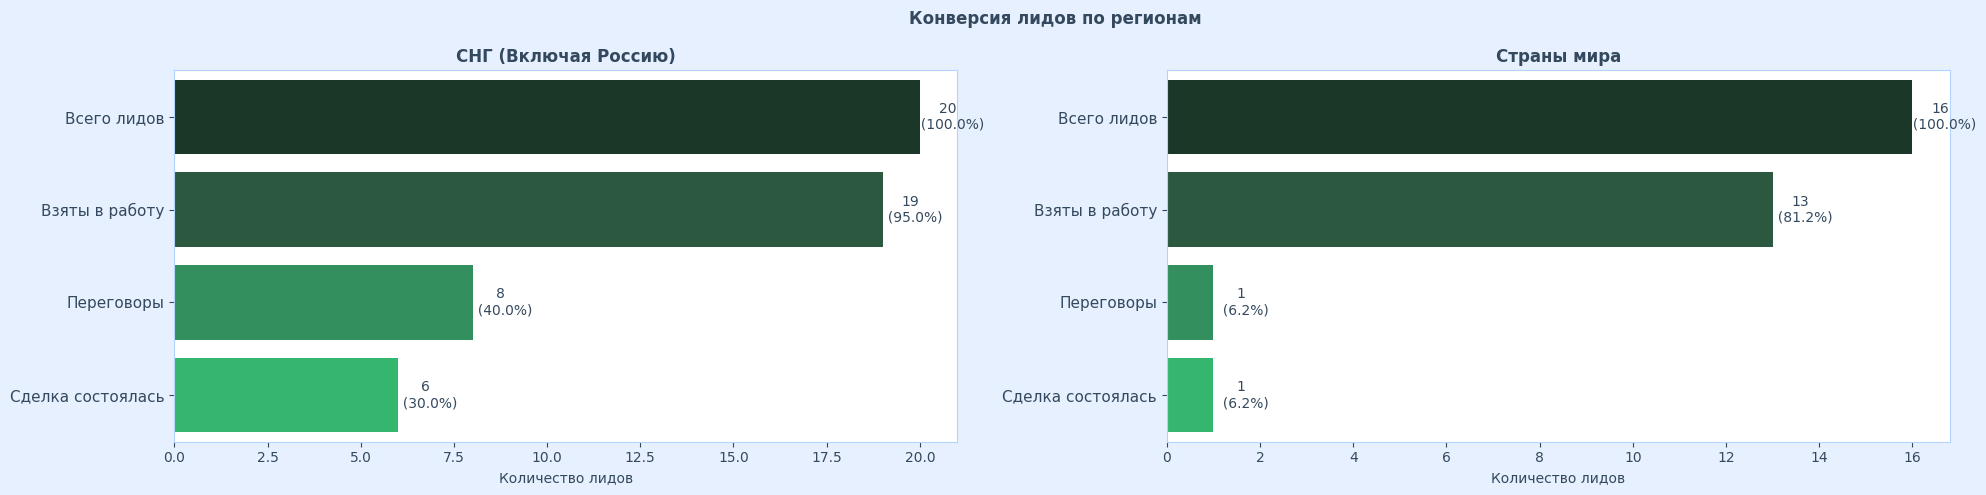

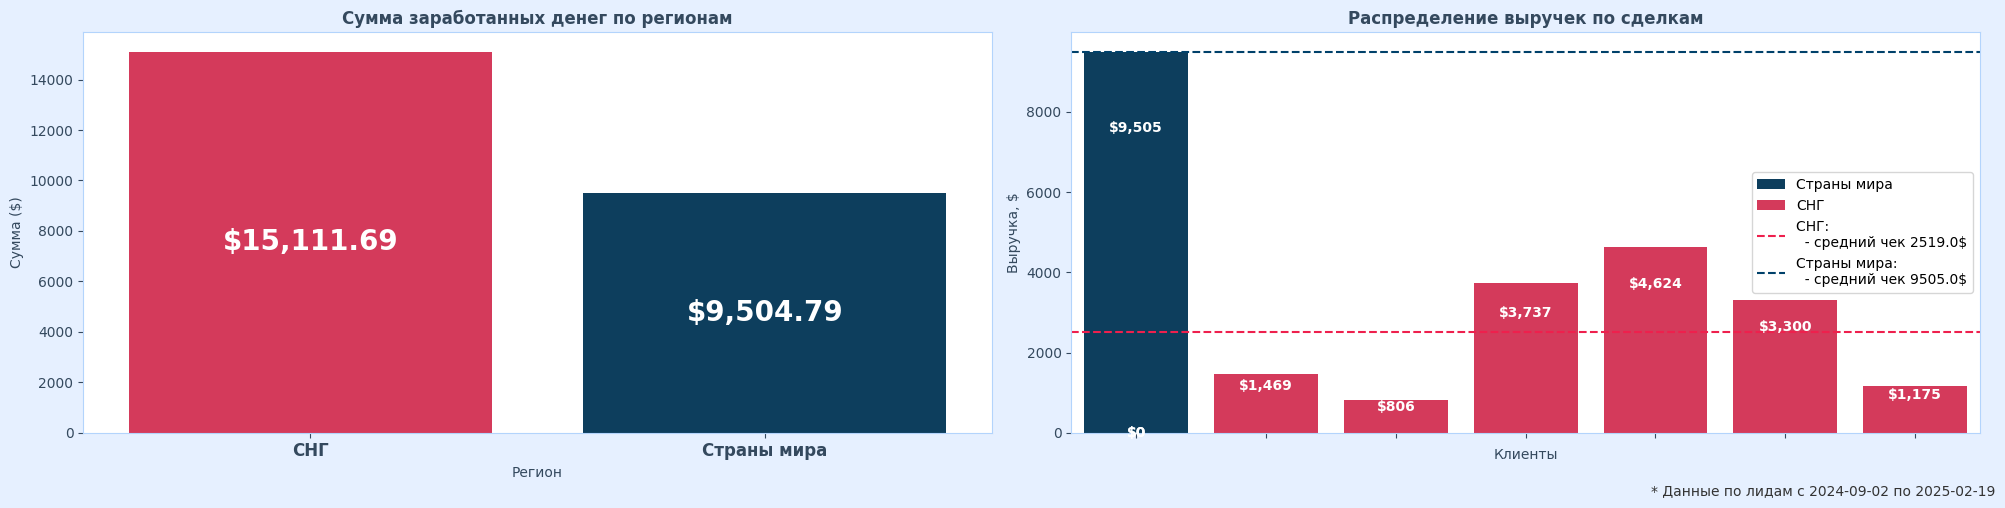

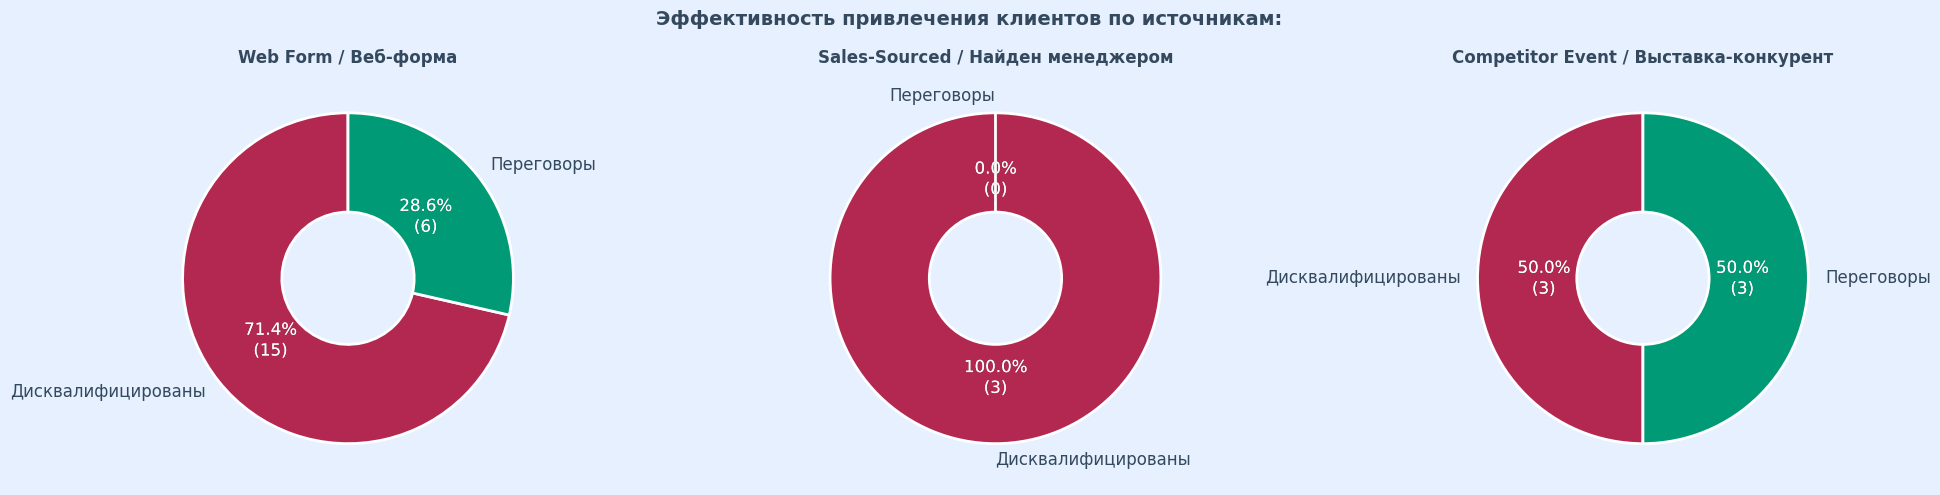

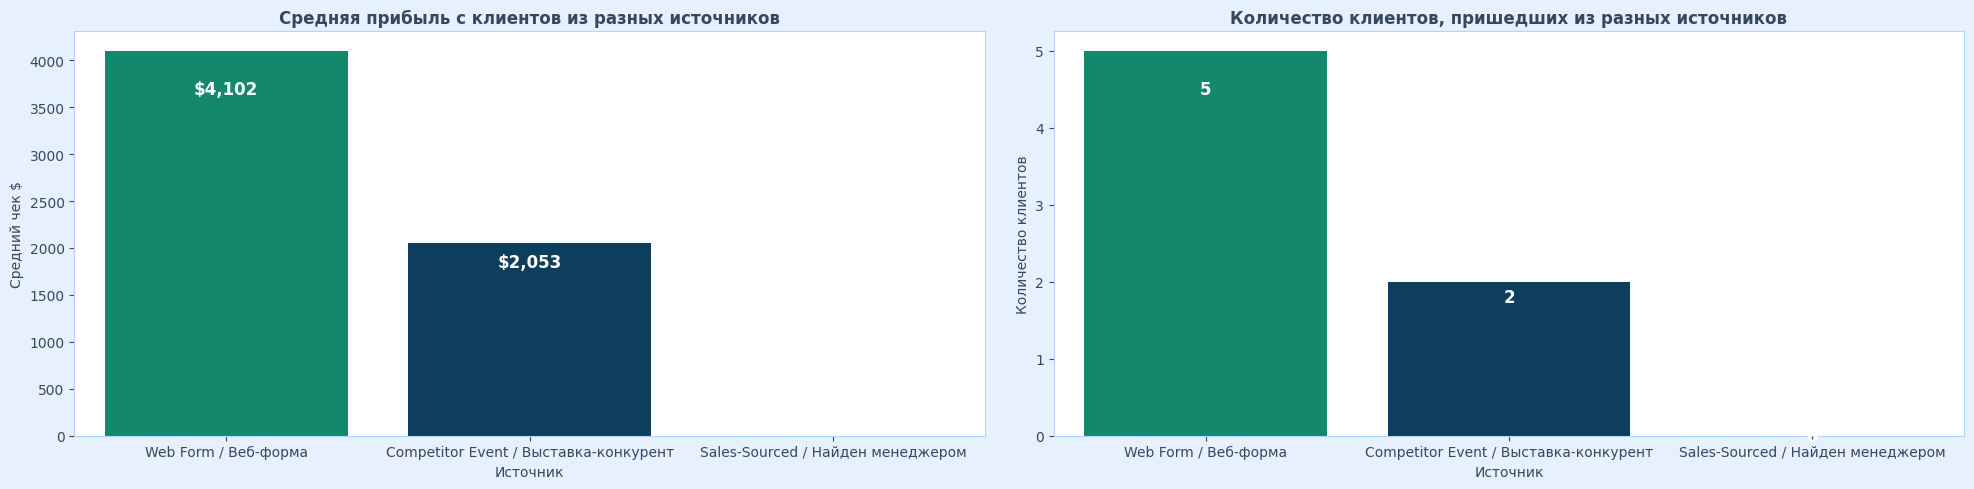

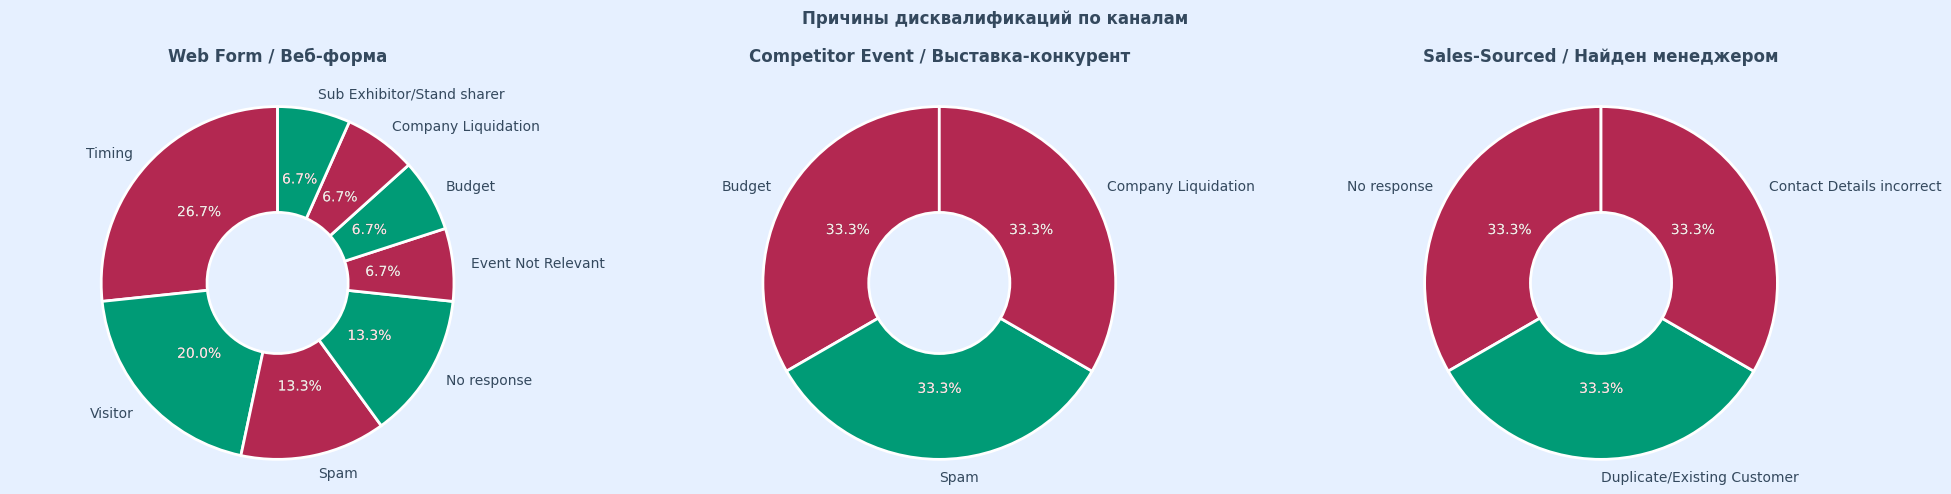

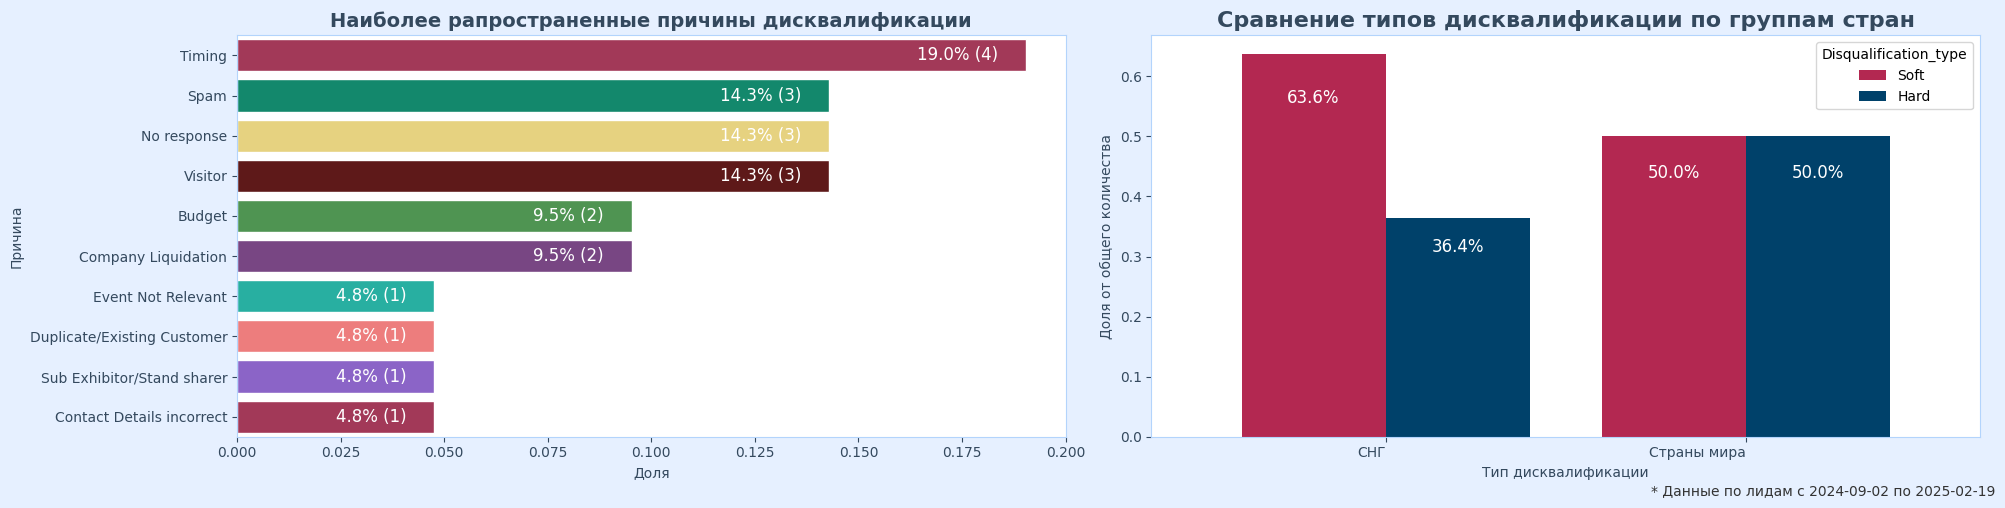

In [3]:
# @title Построение графиков
###################################################################
from matplotlib import patheffects
################################ График 1 ###################################

# Создаем лямбда-функцию для определения группы страны
lead_analysis['country_group'] = lead_analysis['Country (for lead)'].apply(
    lambda x: 'СНГ' if x in ['Armenia', 'Azerbaijan', 'Belarus', 'Kazakhstan', 'Kyrgyzstan', 'Moldova', 'Russia', 'Tajikistan', 'Uzbekistan'] else 'Страны мира'
)
lead_analysis.head(1)

# Создаем статусы: в работе, сделка, дисквалифицированы
lead_analysis['status'] = 'Дисквалифицированы'
lead_analysis.loc[lead_analysis['Lead_status_crm']=='Qualification', 'status'] = 'На обработке'
lead_analysis.loc[lead_analysis['Lead_status_crm']=='New Lead', 'status'] = 'Новый лид'
lead_analysis.loc[lead_analysis['Lead_status_crm']=='To the deal', 'status'] = 'К сделке'
lead_analysis.loc[lead_analysis['Deal status_crm']=='Won', 'status'] = 'Сделка состоялась'


# Настройки цветов
background_color = '#e6f0ff'
plot_background = '#ffffff'
border_color = '#b3d4fc'
text_color = '#34495e'
bar_colors = ['#b32851', '#009b76']

# Пишем функцию для конверсии
def plot_conversion(df, title, ax):
    # Создаем временный df для подсчета
    total_leads = df['ID_lead'].count()
    total_taken = total_leads - len(df[df['status']=='Новый лид'])
    total_to_deal = len(df[(df['status']=='К сделке')|(df['status']=='Сделка состоялась')])
    total_deals_confirmed = len(df[df['status']=='Сделка состоялась'])

    temp_df = pd.DataFrame({'status': ['Всего лидов', 'Взяты в работу', 'Переговоры', 'Сделка состоялась'], 'ID_lead': [total_leads, total_taken, total_to_deal, total_deals_confirmed]})

    # Строим график
    sns.barplot(
        data=temp_df, x='ID_lead', y='status', order=['Всего лидов', 'Взяты в работу', 'Переговоры', 'Сделка состоялась'],
        ax=ax, palette=['#163c28', '#255f3f', '#249e5b', '#20cb6d']
    )
    ax.set_title(title, color=text_color, fontweight='bold')
    ax.set_xlabel('Количество лидов', color=text_color)
    ax.set_ylabel('')
    ax.set_yticklabels(['Всего лидов', 'Взяты в работу', 'Переговоры', 'Сделка состоялась'], fontsize=11)

    # Добавляем значения
    for p in ax.patches:
        width = p.get_width()
        percentage = f'{(width/total_leads * 100):.1f}%'
        ax.annotate(f'{int(width)}\n  ({percentage})', xy=(width, p.get_y() + p.get_height()/2),
                    ha='center', va='center',color=text_color, fontsize=10, xytext=(20, 0), textcoords="offset points")
    ax.tick_params(axis='both', colors=text_color)
    for i in ['bottom', 'left', 'top', 'right']:
      ax.spines[i].set_color(border_color)


# Строим графики
fig = plt.figure(figsize=(20, 5))
fig.patch.set_facecolor(background_color)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

plot_conversion(lead_analysis[lead_analysis['country_group'] == 'СНГ'], 'СНГ (Включая Россию)', ax1)
plot_conversion(lead_analysis[lead_analysis['country_group'] == 'Страны мира'],  'Страны мира', ax2)

plt.suptitle('Конверсия лидов по регионам', fontweight='bold', x=0.53, color=text_color)
plt.tight_layout()
#plt.savefig('11.svg', format='svg', bbox_inches='tight')
plt.show()


################################ График 2 ###################################

fig = plt.figure(figsize=(20, 5))
fig.patch.set_facecolor(background_color)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Пишем функцию построения графика для суммы заработанных денег
def plot_earnings(df, ax):

    # Группируем и считаем сумму
    earnings_data = pd.concat([
        df[df['country_group'] == 'СНГ'].groupby('country_group')['Amount $'].sum().reset_index(),
        df[df['country_group'] == 'Страны мира'].groupby('country_group')['Amount $'].sum().reset_index()
    ])
    # Строим график

    # ax.set_facecolor(plot_background)
    sns.barplot(data=earnings_data, x='country_group', y='Amount $', order=['СНГ', 'Страны мира'], palette=['#ee204d', '#00416a'], ax=ax)

    ax.set_title('Сумма заработанных денег по регионам', color=text_color, fontweight='bold')
    ax.set_xlabel('Регион', color=text_color)
    ax.set_ylabel('Сумма ($)', color=text_color)
    ax.set_xticklabels(['СНГ', 'Страны мира'], fontsize=12,
                      fontweight='bold', color=text_color)

    # Добавляем значения
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'${height:,.2f}', xy=(p.get_x() + p.get_width()/2, height/2), ha='center', va='center', color='white', fontsize=20, fontweight='bold')

    # Стилизация
    ax.tick_params(axis='both', colors=text_color)
    for i in ['bottom', 'left', 'top', 'right']:
      ax.spines[i].set_color(border_color)

    # Инфо по временным рамкам
    plt.figtext(1, 0, f'* Данные по лидам с {lead_analysis['Created_lead'].dt.date.min()} по {lead_analysis['Created_lead'].dt.date.max()}', ha='right', fontsize=10, color='#333333')
    plt.tight_layout()


plot_earnings(lead_analysis, ax1)

################################ График 3 ###################################

colors_for_countries = {'СНГ': '#ee204d', 'Страны мира': '#00416a'}
sns.barplot(
        data=lead_analysis[lead_analysis['Deal status_crm']=='Won'].sort_values(by='Amount $'), ax=ax2, x='ID_lead', y='Amount $',
         palette=colors_for_countries, hue='country_group'
    )
for i in ['СНГ', 'Страны мира']:
  ax2.axhline (
      lead_analysis.loc[lead_analysis['country_group']==i]['Amount $'].mean(), color=colors_for_countries[i], linestyle='--',
      label=f'{i}: \n  - средний чек {lead_analysis.loc[lead_analysis['country_group']==i]['Amount $'].mean().round(0)}$')

for p in ax2.patches:
  height = p.get_height()
  ax2.annotate(f'${height:,.0f}', xy=(p.get_x() + p.get_width()/2, height*0.8), ha='center', va='center', color='white', fontsize=10, fontweight='bold')

ax2.set_title('Распределение выручек по сделкам', color=text_color, fontweight='bold')
ax2.set_xlabel('Клиенты', color=text_color)
ax2.set_ylabel('Выручка, $', color=text_color)
ax2.legend()

ax2.tick_params(axis='both', colors=text_color)
for i in ['bottom', 'left', 'top', 'right']:
  ax2.spines[i].set_color(border_color)

plt.gca().set_xticklabels('')
plt.tight_layout()
#plt.savefig('12.svg', format='svg', bbox_inches='tight')
plt.show()


# Слайд 3 ###################################################################

# Сводим причины дисквалификации SOFT и HARD в один столбец
lead_analysis['Disqualification_reason'] = lead_analysis['Disqualification reason (SOFT)']
lead_analysis['Disqualification_reason'] = lead_analysis['Disqualification_reason'].fillna(0)
lead_analysis['Disqualification_type'] = 'неизвестно'
for i in lead_analysis['Disqualification_reason'].index:
  if lead_analysis.loc[i, 'Disqualification_reason'] == 0:
    lead_analysis.loc[i, 'Disqualification_reason'] = lead_analysis.loc[i, 'Disqualification reason (HARD)']
    lead_analysis.loc[i, 'Disqualification_type'] = 'Hard'
  if lead_analysis.loc[i, 'Disqualification_reason'] == lead_analysis.loc[i, 'Disqualification reason (SOFT)']:
    lead_analysis.loc[i, 'Disqualification_type'] = 'Soft'
  if lead_analysis.loc[i, 'status'] != 'Дисквалифицированы':
    lead_analysis.loc[i, 'Disqualification_type'] = np.nan



############################ График 0 ###########################################

fig = plt.figure(figsize=(20, 5))
fig.patch.set_facecolor(background_color)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# Подготавливаем данные
sources_info = pd.DataFrame(
    lead_analysis.loc[lead_analysis['status']=='Дисквалифицированы'].groupby('Source')['status'].count()
)

for i in lead_analysis['status'].unique():
    sources_info[i] = lead_analysis.loc[lead_analysis['status']==i].groupby('Source')['status'].count()

sources_info['Переговоры'] = sources_info['К сделке'] + sources_info['Сделка состоялась']
sources_info = sources_info[['Дисквалифицированы', 'Переговоры']]
sources_info = sources_info.fillna(0)

sources_axes = {'Web Form / Веб-форма': ax1, 'Sales-Sourced / Найден менеджером': ax2,
                'Competitor Event / Выставка-конкурент': ax3}

# Функция для форматирования меток
def autopct_format(values, total):
    def my_format(pct):
        absolute = int(pct/100.*total)
        return f'{pct:.1f}%\n({absolute})'
    return my_format

# Строим круговые диаграммы
for source in list(sources_axes.keys()):
    # Получаем данные для текущего источника
    data = sources_info.T[source]
    total = data.sum()

    # Создаем круговую диаграмму
    wedges, texts, autotexts = sources_axes[source].pie(data,
        labels=data.index, autopct=autopct_format(data, total),
        startangle=90, colors=bar_colors,
        wedgeprops=dict(width=0.6, edgecolor='w', linewidth=2),
        textprops={'fontsize': 12, 'color': text_color}
    )

    sources_axes[source].set_title(source, color=text_color, fontweight='bold', fontsize=12)

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_path_effects([
            patheffects.Stroke(linewidth=0.1, foreground='black'),
            patheffects.Normal()
        ])

    # Настраиваем внешний вид осей
    for i in ['bottom', 'left', 'top', 'right']:
        sources_axes[source].spines[i].set_color(border_color)

# Общие настройки
plt.suptitle('Эффективность привлечения клиентов по источникам:', fontsize=14,
             fontweight='bold', color=text_color)

plt.tight_layout()
#plt.savefig('31.svg', format='svg', bbox_inches='tight')
plt.show()



############################ График 1 ###########################################


colors_for_sources = {
    'Web Form / Веб-форма': '#009b76', 'Competitor Event / Выставка-конкурент': '#00416a',
    'Sales-Sourced / Найден менеджером': '#ee204d'}

fig = plt.figure(figsize=(20, 5))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.barplot(
        data=pd.DataFrame(lead_analysis.groupby('Source')['Amount $'].mean()), x='Source', y='Amount $', order=lead_analysis.groupby('Source')['Amount $'].mean().fillna(0).sort_values(ascending=False).index,
        ax=ax1, palette=colors_for_sources
    )
ax1.set_title('Средняя прибыль с клиентов из разных источников', color=text_color, fontweight='bold')
ax1.set_xlabel('Источник', color=text_color)
ax1.set_ylabel('Средний чек $', color=text_color)

for p in ax1.patches:
  height = p.get_height()
  ax1.annotate(f'${height:,.0f}', xy=(p.get_x() + p.get_width()/2, height*0.9), ha='center', va='center', color='white', fontsize=12, fontweight='bold')

ax1.tick_params(axis='both', colors=text_color)
for i in ['bottom', 'left', 'top', 'right']:
  ax1.spines[i].set_color(border_color)


sns.barplot(
        data=pd.DataFrame(lead_analysis.groupby('Source')['Amount $'].count()), x='Source', y='Amount $', order=lead_analysis.groupby('Source')['Amount $'].count().sort_values(ascending=False).index,
        ax=ax2, palette=colors_for_sources
    )

ax2.set_title('Количество клиентов, пришедших из разных источников', color=text_color, fontweight='bold')
ax2.set_xlabel('Источник', color=text_color)
ax2.set_ylabel('Количество клиентов', color=text_color)

for p in ax2.patches:
  height = p.get_height()
  ax2.annotate(f'{height:,.0f}', xy=(p.get_x() + p.get_width()/2, height*0.9), ha='center', va='center', color='white', fontsize=12, fontweight='bold')

ax2.tick_params(axis='both', colors=text_color)
for i in ['bottom', 'left', 'top', 'right']:
  ax2.spines[i].set_color(border_color)

plt.tight_layout()
#plt.savefig('32.svg', format='svg', bbox_inches='tight')
plt.show()

# Слайд 2 ###################################################################


############################ График 0 ###########################################
fig = plt.figure(figsize=(20, 5))
fig.patch.set_facecolor(background_color)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#data = source_disq[source_disq['Source']=='Competitor Event / Выставка-конкурент']['Disqualification_reason'].value_counts()
axes_for_sources = {'Web Form / Веб-форма': ax1, 'Competitor Event / Выставка-конкурент': ax2, 'Sales-Sourced / Найден менеджером': ax3}
for i in lead_analysis['Source'].unique():

  ax=axes_for_sources[i]
  #data = source_disq[source_disq['Source']==i].groupby('Disqualification_reason')['Disqualification_type'].sum().sort_values(ascending=False)
  data = lead_analysis.loc[lead_analysis['Source']==i]['Disqualification_reason'].value_counts()
  # Создаем круговую диаграмму
  wedges, texts, autotexts = ax.pie(data, labels=data.index, autopct='%1.1f%%',
                                    startangle=90, colors=bar_colors,
                                    wedgeprops=dict(width=0.6, edgecolor='w', linewidth=2),
                                    textprops={'fontsize': 10,'color': text_color})

  ax.axis('equal')
  ax.set_title(f'{i}', fontsize=12, fontweight='bold', color=text_color, pad=20)

  for autotext in autotexts:
    autotext.set_color('#f6e6e5')
    autotext.set_fontsize(10)
    autotext.set_path_effects([patheffects.Stroke(linewidth=0.1, foreground='black'),
                               patheffects.Normal()])

for i in ['bottom', 'left', 'top', 'right']:
  ax.spines[i].set_color(border_color)

plt.suptitle('Причины дисквалификаций по каналам',  fontsize=12, fontweight='bold', color=text_color)
plt.tight_layout()
#plt.savefig('21.svg', format='svg', bbox_inches='tight')
plt.show()
############################ График 1 ###########################################

fig = plt.figure(figsize=(20, 5))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

custome_palette = ["#b32851", "#009b76", "#f7dc6f", "#6a0d0d", "#43a047",
                   "#7f3c8d", "#11c6b3", "#ff6b6b", "#8854d7"]

# Подготовка данных: по каждой причине дисквалификации её абсолютное значение и процент от всех дисквалифицированных лидов
disq_reasons = lead_analysis[lead_analysis['status'] == 'Дисквалифицированы']['Disqualification_reason'].value_counts(normalize=True).reset_index()
disq_reasons.columns = ['Причина', 'Доля']
disq_reasons['Абсолютное значение'] = disq_reasons['Доля'] * len(lead_analysis[lead_analysis['status'] == 'Дисквалифицированы'])

# Строим график
sns.barplot(data=disq_reasons, x='Доля', y='Причина', ax=ax1, orient='h',
            palette=custome_palette, edgecolor='white')

# Добавление значений на график
for i, rect in enumerate(ax1.patches):
    width = rect.get_width()
    height = rect.get_height()
    x = rect.get_x() + rect.get_width()
    y = rect.get_y() + height / 2

    percent = f'{width*100:.1f}%'  # процентное значение
    value = int(disq_reasons['Абсолютное значение'].iloc[i])  # абсолютное значение

    ax1.annotate(f'{percent} ({value})', xy=(x, y), xytext=(-20, 0),
                 textcoords='offset points', ha='right', va='center',
                 fontsize=12, color='white')

ax1.tick_params(axis='both', colors=text_color)
for i in ['bottom', 'left', 'top', 'right']:
  ax1.spines[i].set_color(border_color)
ax1.set_title('Наиболее рапространенные причины дисквалификации', fontsize=14, fontweight='bold', color=text_color)
ax1.set_xlabel('Доля', color=text_color)
ax1.set_ylabel('Причина', color=text_color)
ax1.tick_params(axis='both', which='major', color=text_color)

############################ График 2 ###########################################

# Создаем df: процент каждого типа дисквалификации (hard или soft) от общего количества у СНГ и других стран
disqualification_df = pd.DataFrame({
    'СНГ': lead_analysis[lead_analysis['country_group'] == 'СНГ']['Disqualification_type'].value_counts(normalize=True),
    'Страны мира': lead_analysis[lead_analysis['country_group'] == 'Страны мира']['Disqualification_type'].value_counts(normalize=True)
    })
disqualification_df = disqualification_df.T

# Строим график
disqualification_df.plot( kind='bar', ax=ax2, color=['#b32851', '#00416a'], width=0.8)

ax2.set_title('Сравнение типов дисквалификации по группам стран',
                 color=text_color, fontsize=16, fontweight='bold')
ax2.set_xlabel('Тип дисквалификации', color=text_color)
ax2.set_ylabel('Доля от общего количества', color=text_color)

# Значения на графике
for container, group in zip(ax2.containers, ['СНГ', 'Страны мира']):
  for p in container.patches:
    height = p.get_height()
    ax2.annotate(f'{height*100:.1f}%', xy=(p.get_x() + p.get_width()/2, height/1.1),
                ha='center', va='top', color='white', fontsize=12)

    plt.tick_params(axis='both', colors=text_color)

    for i in ['bottom', 'left', 'top', 'right']:
      ax2.spines[i].set_color(border_color)
    plt.xticks(rotation=0, ha='right')

# Уточнение по временному промежутку
plt.figtext(1, 0,
            f'* Данные по лидам с {lead_analysis['Created_lead'].dt.date.min()} по {lead_analysis['Created_lead'].dt.date.max()}',
            ha='right', fontsize=10, color='#333333')
plt.tight_layout()
#plt.savefig('22.svg', format='svg', bbox_inches='tight')
plt.show()


###################################################################


In [4]:
# @title Формирование отчета в PDF

with PdfPages('Отчет_по_лидам.pdf') as pdf:
  ############################## График 1 ###################################

# Создаем лямбда-функцию для определения группы страны


# Настройки цветов
  background_color = '#e6f0ff'
  plot_background = '#ffffff'
  border_color = '#b3d4fc'
  text_color = '#34495e'
  bar_colors = ['#b32851', '#009b76']

# Пишем функцию для конверсии
  def plot_conversion(df, title, ax):

    # Строим график
      total_leads = df['ID_lead'].count()
      total_taken = total_leads - len(df[df['status']=='Новый лид'])
      total_to_deal = len(df[(df['status']=='К сделке')|(df['status']=='Сделка состоялась')])
      total_deals_confirmed = len(df[df['status']=='Сделка состоялась'])

      temp_df = pd.DataFrame({'status': ['Всего лидов', 'Взяты в работу', 'Переговоры', 'Сделка состоялась'], 'ID_lead': [total_leads, total_taken, total_to_deal, total_deals_confirmed]})

      sns.barplot(
          data=temp_df, x='ID_lead', y='status', order=['Всего лидов', 'Взяты в работу', 'Переговоры', 'Сделка состоялась'],
          ax=ax, palette=['#163c28', '#255f3f', '#249e5b', '#20cb6d']
      )
      ax.set_title(title, color=text_color, fontweight='bold')
      ax.set_xlabel('Количество лидов', color=text_color)
      ax.set_ylabel('')
      ax.set_yticklabels(['Всего лидов', 'Взяты в работу', 'Переговоры', 'Сделка состоялась'], fontsize=11)

    # Добавляем значения
      for p in ax.patches:
          width = p.get_width()
          percentage = f'{(width/total_leads * 100):.1f}%'
          ax.annotate(f'{int(width)}\n  ({percentage})', xy=(width, p.get_y() + p.get_height()/2),
                     ha='center', va='center',color=text_color, fontsize=10, xytext=(20, 0), textcoords="offset points")
      ax.tick_params(axis='both', colors=text_color)
      for i in ['bottom', 'left', 'top', 'right']:
        ax.spines[i].set_color(border_color)


  # Строим графики
  fig = plt.figure(figsize=(20, 5))
  fig.patch.set_facecolor(background_color)
  ax1 = fig.add_subplot(1, 2, 1)
  ax2 = fig.add_subplot(1, 2, 2)

  plot_conversion(lead_analysis[lead_analysis['country_group'] == 'СНГ'], 'СНГ (Включая Россию)', ax1)
  plot_conversion(lead_analysis[lead_analysis['country_group'] == 'Страны мира'],  'Страны мира', ax2)

  plt.suptitle('Конверсия лидов по регионам', fontweight='bold', x=0.53, color=text_color)
  plt.tight_layout()
  #plt.savefig('11.svg', format='svg', bbox_inches='tight')
  pdf.savefig(fig, bbox_inches='tight')
  plt.close()
  plt.show()


################################ График 2 ###################################

  fig = plt.figure(figsize=(20, 5))
  fig.patch.set_facecolor(background_color)
  ax1 = fig.add_subplot(1, 2, 1)
  ax2 = fig.add_subplot(1, 2, 2)

# Пишем функцию построения графика для суммы заработанных денег
  def plot_earnings(df, ax):

    # Группируем и считаем сумму
      earnings_data = pd.concat([
          df[df['country_group'] == 'СНГ'].groupby('country_group')['Amount $'].sum().reset_index(),
          df[df['country_group'] == 'Страны мира'].groupby('country_group')['Amount $'].sum().reset_index()
      ])
    # Строим график

    # ax.set_facecolor(plot_background)
      sns.barplot(data=earnings_data, x='country_group', y='Amount $', order=['СНГ', 'Страны мира'], palette=['#ee204d', '#00416a'], ax=ax)

      ax.set_title('Сумма заработанных денег по регионам', color=text_color, fontweight='bold')
      ax.set_xlabel('Регион', color=text_color)
      ax.set_ylabel('Сумма ($)', color=text_color)
      ax.set_xticklabels(['СНГ', 'Страны мира'], fontsize=12,
                        fontweight='bold', color=text_color)

    # Добавляем значения
      for p in ax.patches:
          height = p.get_height()
          ax.annotate(f'${height:,.2f}', xy=(p.get_x() + p.get_width()/2, height/2), ha='center', va='center', color='white', fontsize=20, fontweight='bold')

    # Стилизация
      ax.tick_params(axis='both', colors=text_color)
      for i in ['bottom', 'left', 'top', 'right']:
        ax.spines[i].set_color(border_color)

    # Инфо по временным рамкам
      plt.figtext(1, 0, f'* Данные по лидам с {lead_analysis['Created_lead'].dt.date.min()} по {lead_analysis['Created_lead'].dt.date.max()}', ha='right', fontsize=10, color='#333333')
      plt.tight_layout()


  plot_earnings(lead_analysis, ax1)

################################ График 3 ###################################

  colors_for_countries = {'СНГ': '#ee204d', 'Страны мира': '#00416a'}
  sns.barplot(
          data=lead_analysis[lead_analysis['Deal status_crm']=='Won'].sort_values(by='Amount $'), ax=ax2, x='ID_lead', y='Amount $',
           palette=colors_for_countries, hue='country_group'
      )
  for i in ['СНГ', 'Страны мира']:
    ax2.axhline (
        lead_analysis.loc[lead_analysis['country_group']==i]['Amount $'].mean(), color=colors_for_countries[i], linestyle='--',
        label=f'{i}: \n  - средний чек {lead_analysis.loc[lead_analysis['country_group']==i]['Amount $'].mean().round(0)}$')

  for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'${height:,.0f}', xy=(p.get_x() + p.get_width()/2, height*0.8), ha='center', va='center', color='white', fontsize=10, fontweight='bold')

  ax2.set_title('Распределение выручек по сделкам', color=text_color, fontweight='bold')
  ax2.set_xlabel('Клиенты', color=text_color)
  ax2.set_ylabel('Выручка, $', color=text_color)
  ax2.legend()

  ax2.tick_params(axis='both', colors=text_color)
  for i in ['bottom', 'left', 'top', 'right']:
    ax2.spines[i].set_color(border_color)

  plt.gca().set_xticklabels('')
  plt.tight_layout()
  #plt.savefig('12.svg', format='svg', bbox_inches='tight')
  pdf.savefig(fig, bbox_inches='tight')
  plt.close()
  plt.show()


# Слайд 3 ###################################################################

# Сводим причины дисквалификации SOFT и HARD в один столбец
  lead_analysis['Disqualification_reason'] = lead_analysis['Disqualification reason (SOFT)']
  lead_analysis['Disqualification_reason'] = lead_analysis['Disqualification_reason'].fillna(0)
  lead_analysis['Disqualification_type'] = 'неизвестно'
  for i in lead_analysis['Disqualification_reason'].index:
    if lead_analysis.loc[i, 'Disqualification_reason'] == 0:
      lead_analysis.loc[i, 'Disqualification_reason'] = lead_analysis.loc[i, 'Disqualification reason (HARD)']
      lead_analysis.loc[i, 'Disqualification_type'] = 'Hard'
    if lead_analysis.loc[i, 'Disqualification_reason'] == lead_analysis.loc[i, 'Disqualification reason (SOFT)']:
      lead_analysis.loc[i, 'Disqualification_type'] = 'Soft'
    if lead_analysis.loc[i, 'status'] != 'Дисквалифицированы':
      lead_analysis.loc[i, 'Disqualification_type'] = np.nan



############################ График 0 ###########################################

  fig = plt.figure(figsize=(20, 5))
  fig.patch.set_facecolor(background_color)
  ax1 = fig.add_subplot(1, 3, 1)
  ax2 = fig.add_subplot(1, 3, 2)
  ax3 = fig.add_subplot(1, 3, 3)

# Подготавливаем данные
  sources_info = pd.DataFrame(
      lead_analysis.loc[lead_analysis['status']=='Дисквалифицированы'].groupby('Source')['status'].count()
  )

  for i in lead_analysis['status'].unique():
      sources_info[i] = lead_analysis.loc[lead_analysis['status']==i].groupby('Source')['status'].count()

  sources_info['Переговоры'] = sources_info['К сделке'] + sources_info['Сделка состоялась']
  sources_info = sources_info[['Дисквалифицированы', 'Переговоры']]
  sources_info = sources_info.fillna(0)

  sources_axes = {'Web Form / Веб-форма': ax1, 'Sales-Sourced / Найден менеджером': ax2,
                  'Competitor Event / Выставка-конкурент': ax3}

# Функция для форматирования меток
  def autopct_format(values, total):
      def my_format(pct):
          absolute = int(pct/100.*total)
          return f'{pct:.1f}%\n({absolute})'
      return my_format

# Строим круговые диаграммы
  for source in list(sources_axes.keys()):
      # Получаем данные для текущего источника
      data = sources_info.T[source]
      total = data.sum()

    # Создаем круговую диаграмму
      wedges, texts, autotexts = sources_axes[source].pie(data,
          labels=data.index, autopct=autopct_format(data, total),
          startangle=90, colors=bar_colors,
          wedgeprops=dict(width=0.6, edgecolor='w', linewidth=2),
          textprops={'fontsize': 12, 'color': text_color}
      )

      sources_axes[source].set_title(source, color=text_color, fontweight='bold', fontsize=12)

      for autotext in autotexts:
          autotext.set_color('white')
          autotext.set_path_effects([
              patheffects.Stroke(linewidth=0.1, foreground='black'),
              patheffects.Normal()
          ])

    # Настраиваем внешний вид осей
      for i in ['bottom', 'left', 'top', 'right']:
          sources_axes[source].spines[i].set_color(border_color)

# Общие настройки
  plt.suptitle('Эффективность привлечения клиентов по источникам:', fontsize=14,
               fontweight='bold', color=text_color)

  plt.tight_layout()
  #plt.savefig('31.svg', format='svg', bbox_inches='tight')
  pdf.savefig(fig, bbox_inches='tight')
  plt.close()
  plt.show()



############################ График 1 ###########################################


  colors_for_sources = {
      'Web Form / Веб-форма': '#009b76', 'Competitor Event / Выставка-конкурент': '#00416a',
      'Sales-Sourced / Найден менеджером': '#ee204d'}

  fig = plt.figure(figsize=(20, 5))
  fig.patch.set_facecolor(background_color)

  ax1 = fig.add_subplot(1, 2, 1)
  ax2 = fig.add_subplot(1, 2, 2)

  sns.barplot(
          data=pd.DataFrame(lead_analysis.groupby('Source')['Amount $'].mean()), x='Source', y='Amount $', order=lead_analysis.groupby('Source')['Amount $'].mean().fillna(0).sort_values(ascending=False).index,
          ax=ax1, palette=colors_for_sources
     )
  ax1.set_title('Средняя прибыль с клиентов из разных источников', color=text_color, fontweight='bold')
  ax1.set_xlabel('Источник', color=text_color)
  ax1.set_ylabel('Средний чек $', color=text_color)

  for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'${height:,.0f}', xy=(p.get_x() + p.get_width()/2, height*0.9), ha='center', va='center', color='white', fontsize=12, fontweight='bold')

  ax1.tick_params(axis='both', colors=text_color)
  for i in ['bottom', 'left', 'top', 'right']:
    ax1.spines[i].set_color(border_color)


  sns.barplot(
          data=pd.DataFrame(lead_analysis.groupby('Source')['Amount $'].count()), x='Source', y='Amount $', order=lead_analysis.groupby('Source')['Amount $'].count().sort_values(ascending=False).index,
          ax=ax2, palette=colors_for_sources
      )

  ax2.set_title('Количество клиентов, пришедших из разных источников', color=text_color, fontweight='bold')
  ax2.set_xlabel('Источник', color=text_color)
  ax2.set_ylabel('Количество клиентов', color=text_color)

  for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:,.0f}', xy=(p.get_x() + p.get_width()/2, height*0.9), ha='center', va='center', color='white', fontsize=12, fontweight='bold')

  ax2.tick_params(axis='both', colors=text_color)
  for i in ['bottom', 'left', 'top', 'right']:
    ax2.spines[i].set_color(border_color)

  plt.tight_layout()
  #plt.savefig('32.svg', format='svg', bbox_inches='tight')
  pdf.savefig(fig, bbox_inches='tight')
  plt.close()
  plt.show()

# Слайд 2 ###################################################################


############################ График 0 ###########################################
  fig = plt.figure(figsize=(20, 5))
  fig.patch.set_facecolor(background_color)
  ax1 = fig.add_subplot(131)
  ax2 = fig.add_subplot(132)
  ax3 = fig.add_subplot(133)

  #data = source_disq[source_disq['Source']=='Competitor Event / Выставка-конкурент']['Disqualification_reason'].value_counts()
  axes_for_sources = {'Web Form / Веб-форма': ax1, 'Competitor Event / Выставка-конкурент': ax2, 'Sales-Sourced / Найден менеджером': ax3}
  for i in lead_analysis['Source'].unique():

    ax=axes_for_sources[i]
    #data = source_disq[source_disq['Source']==i].groupby('Disqualification_reason')['Disqualification_type'].sum().sort_values(ascending=False)
    data = lead_analysis.loc[lead_analysis['Source']==i]['Disqualification_reason'].value_counts()
    # Создаем круговую диаграмму
    wedges, texts, autotexts = ax.pie(data, labels=data.index, autopct='%1.1f%%',
                                      startangle=90, colors=bar_colors,
                                      wedgeprops=dict(width=0.6, edgecolor='w', linewidth=2),
                                      textprops={'fontsize': 10,'color': text_color})

    ax.axis('equal')
    ax.set_title(f'{i}', fontsize=12, fontweight='bold', color=text_color, pad=20)

    for autotext in autotexts:
      autotext.set_color('#f6e6e5')
      autotext.set_fontsize(10)
      autotext.set_path_effects([patheffects.Stroke(linewidth=0.1, foreground='black'),
                                 patheffects.Normal()])

  for i in ['bottom', 'left', 'top', 'right']:
    ax.spines[i].set_color(border_color)

  plt.suptitle('Причины дисквалификаций по каналам',  fontsize=12, fontweight='bold', color=text_color)
  plt.tight_layout()
  #plt.savefig('21.svg', format='svg', bbox_inches='tight')
  pdf.savefig(fig, bbox_inches='tight')
  plt.close()
  plt.show()
############################ График 1 ###########################################

  fig = plt.figure(figsize=(20, 5))
  fig.patch.set_facecolor(background_color)

  ax1 = fig.add_subplot(1, 2, 1)
  ax2 = fig.add_subplot(1, 2, 2)

  custome_palette = ["#b32851", "#009b76", "#f7dc6f", "#6a0d0d", "#43a047",
                     "#7f3c8d", "#11c6b3", "#ff6b6b", "#8854d7"]

# Подготовка данных: по каждой причине дисквалификации её абсолютное значение и процент от всех дисквалифицированных лидов
  disq_reasons = lead_analysis[lead_analysis['status'] == 'Дисквалифицированы']['Disqualification_reason'].value_counts(normalize=True).reset_index()
  disq_reasons.columns = ['Причина', 'Доля']
  disq_reasons['Абсолютное значение'] = disq_reasons['Доля'] * len(lead_analysis[lead_analysis['status'] == 'Дисквалифицированы'])

# Строим график
  sns.barplot(data=disq_reasons, x='Доля', y='Причина', ax=ax1, orient='h',
              palette=custome_palette, edgecolor='white')

# Добавление значений на график
  for i, rect in enumerate(ax1.patches):
      width = rect.get_width()
      height = rect.get_height()
      x = rect.get_x() + rect.get_width()
      y = rect.get_y() + height / 2

      percent = f'{width*100:.1f}%'  # процентное значение
      value = int(disq_reasons['Абсолютное значение'].iloc[i])  # абсолютное значение

      ax1.annotate(f'{percent} ({value})', xy=(x, y), xytext=(-20, 0),
                   textcoords='offset points', ha='right', va='center',
                   fontsize=12, color='white')

  ax1.tick_params(axis='both', colors=text_color)
  for i in ['bottom', 'left', 'top', 'right']:
    ax1.spines[i].set_color(border_color)
  ax1.set_title('Наиболее рапространенные причины дисквалификации', fontsize=14, fontweight='bold', color=text_color)
  ax1.set_xlabel('Доля', color=text_color)
  ax1.set_ylabel('Причина', color=text_color)
  ax1.tick_params(axis='both', which='major', color=text_color)

############################ График 2 ###########################################

# Создаем df: процент каждого типа дисквалификации (hard или soft) от общего количества у СНГ и других стран
  disqualification_df = pd.DataFrame({
      'СНГ': lead_analysis[lead_analysis['country_group'] == 'СНГ']['Disqualification_type'].value_counts(normalize=True),
      'Страны мира': lead_analysis[lead_analysis['country_group'] == 'Страны мира']['Disqualification_type'].value_counts(normalize=True)
      })
  disqualification_df = disqualification_df.T

# Строим график
  disqualification_df.plot( kind='bar', ax=ax2, color=['#b32851', '#00416a'], width=0.8)

  ax2.set_title('Сравнение типов дисквалификации по группам стран',
                   color=text_color, fontsize=16, fontweight='bold')
  ax2.set_xlabel('Тип дисквалификации', color=text_color)
  ax2.set_ylabel('Доля от общего количества', color=text_color)

# Значения на графике
  for container, group in zip(ax2.containers, ['СНГ', 'Страны мира']):
    for p in container.patches:
      height = p.get_height()
      ax2.annotate(f'{height*100:.1f}%', xy=(p.get_x() + p.get_width()/2, height/1.1),
                  ha='center', va='top', color='white', fontsize=12)

      plt.tick_params(axis='both', colors=text_color)

      for i in ['bottom', 'left', 'top', 'right']:
        ax2.spines[i].set_color(border_color)
      plt.xticks(rotation=0, ha='right')

# Уточнение по временному промежутку
  plt.figtext(1, 0,
              f'* Данные по лидам с {lead_analysis['Created_lead'].dt.date.min()} по {lead_analysis['Created_lead'].dt.date.max()}',
              ha='right', fontsize=10, color='#333333')
  plt.tight_layout()
  #plt.savefig('22.svg', format='svg', bbox_inches='tight')
  pdf.savefig(fig, bbox_inches='tight')
  plt.close()
  plt.show()


###################################################################

print('Отчет по лидам успешно сохранен в файле disqualification_analysis_report.pdf')


Отчет по лидам успешно сохранен в файле disqualification_analysis_report.pdf


In [5]:
# @title Результат
print ('Все ячейки отработаны, графики выведены, отчет в пдф сформирован')

Все ячейки отработаны, графики выведены, отчет в пдф сформирован
